In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\DOWNLOADS/loan_data_set.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
mean_value=df.mean()


In [5]:
df.fillna(mean_value,inplace=True)

In [6]:
df=df.fillna(method="ffill")

In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

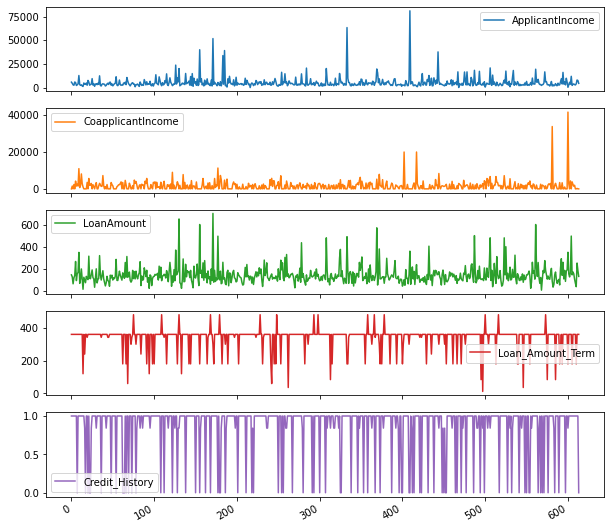

In [8]:
df.plot(subplots=True,figsize=(10,10))

In [9]:
corr=df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<AxesSubplot:>

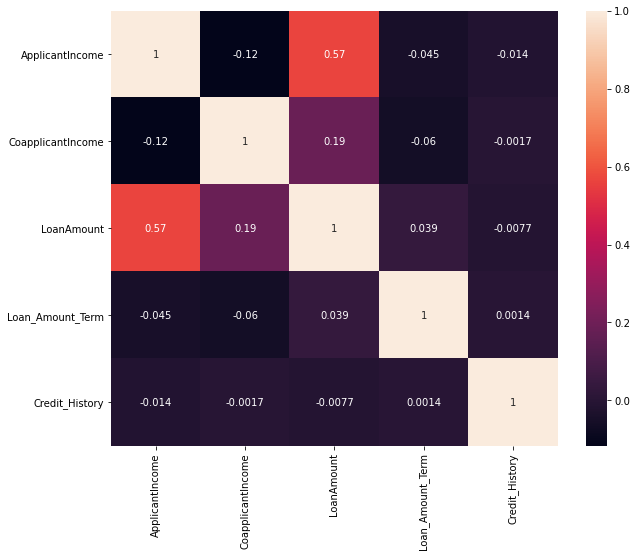

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

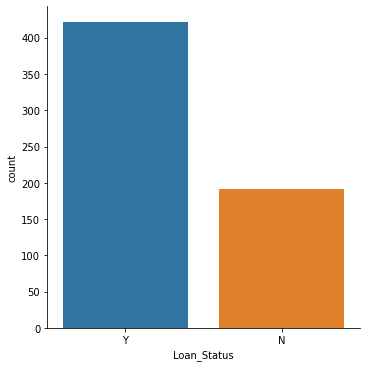

In [11]:
sns.catplot(data=df,x="Loan_Status",kind="count")

In [12]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 8 categorical variables


In [13]:
print(categorical)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [14]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [15]:
print(numerical)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [16]:
df=df.drop(['Loan_ID','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Label_Loan_Status"]=le.fit_transform(df["Loan_Status"])

In [18]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=["Loan_Status","Label_Loan_Status"])
y=df["Label_Loan_Status"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
ypred=model.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
acc

0.8373983739837398

In [22]:
cm=confusion_matrix(ytest,ypred)
cm

array([[15, 18],
       [ 2, 88]], dtype=int64)

<AxesSubplot:>

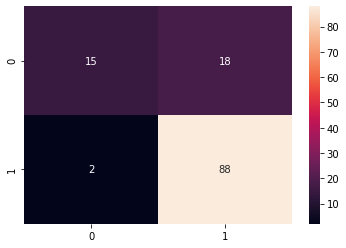

In [23]:
sns.heatmap(cm,annot=True)

In [24]:
classification_report(ytest,ypred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.45      0.60        33\n           1       0.83      0.98      0.90        90\n\n    accuracy                           0.84       123\n   macro avg       0.86      0.72      0.75       123\nweighted avg       0.84      0.84      0.82       123\n'

In [25]:
ypred_prob=model.predict_proba(xtest)[:,1]
ypred_prob

array([0.80308672, 0.79376126, 0.70434226, 0.77027643, 0.78375091,
       0.26450867, 0.90479139, 0.73941649, 0.16774479, 0.75567208,
       0.79787503, 0.79558228, 0.76247316, 0.72806762, 0.81022522,
       0.8025295 , 0.66134103, 0.77124946, 0.70668528, 0.12742842,
       0.1291352 , 0.76121919, 0.78478028, 0.75584101, 0.68991682,
       0.74482521, 0.72235048, 0.71907165, 0.14350663, 0.15837547,
       0.77526253, 0.80756153, 0.77187128, 0.76574213, 0.75041989,
       0.12190084, 0.74362658, 0.7683713 , 0.79301936, 0.79159134,
       0.79910524, 0.13559516, 0.93349349, 0.77223757, 0.80068868,
       0.74430201, 0.79230977, 0.7935431 , 0.77613457, 0.7624759 ,
       0.80023818, 0.76754667, 0.77615358, 0.76970483, 0.76185502,
       0.6068851 , 0.78175495, 0.79193017, 0.76618119, 0.79204099,
       0.09505423, 0.77958461, 0.76665089, 0.16141937, 0.79156741,
       0.68547812, 0.63544195, 0.76075214, 0.76253608, 0.67186092,
       0.64933007, 0.78272514, 0.76982697, 0.90708545, 0.77181

In [26]:
ytest

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Label_Loan_Status, Length: 123, dtype: int32

In [27]:
ytest

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Label_Loan_Status, Length: 123, dtype: int32

In [28]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(ytest,ypred_prob)

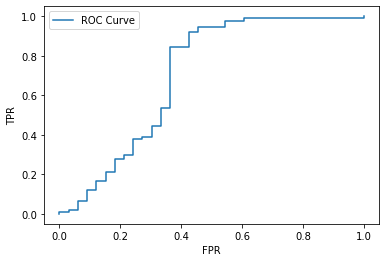

In [29]:
auc=metrics.roc_auc_score(ytest,ypred_prob)
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()